# Optimal Control of a Unit Mass
ECE367 Problem Set 4 Question 5 


*Aman Bhargava -- 1005189733*

## Key Points of Problem Statement
* Optimal control of a unit mass.
* Subject to force $f(t)$, $f(t) = p_n$ for $n-1 < t \leq n$.
* $n\in \{1,\dots,10\}$.
* No friction.

## Resultant Formulae (Given)

$$x(n) = x(n-1) + \dot{x}(n-1) + \frac{1}{2}p_n$$
$$\dot{x}(n) = \dot{x}(n-1) + p_n$$


## Resultant Formulae (Derived)

$$\begin{bmatrix}x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_{10} \end{bmatrix} = \begin{bmatrix} 1/2 & 0 & 0 & \dots & 0 \\ 3/2 & 1/2 & 0 & \dots & 0 \\ 5/2 & 3/2 & 1/2 & \dots & 0 \\ \vdots & & \dots & \ddots & \vdots \\ 19/2& & & & 1/2 \\\end{bmatrix} \begin{bmatrix}p_1\\ p_2 \\ p_3 \\ \vdots \\ p_{10}\end{bmatrix}$$
$$\dot{x}(n) = \sum_{i=1}^n p_i$$

## Goals
| Question B: Find $p_n, n$ $\in[10]$ that minimizes $$\sum_{n=1}^{10} p_n^2$$ subject to the following requirements: 
- Constraint 1: $x_{10} = 1$ (getting to the destination).
    - This is equivalent to $M[10,:]\cdot p = 1$
- Constraint 2: $\dot{x}_{10} = 0$ (stopping flat at the destination.
    - This is equivalent to $[1\,1\,\dots\,1]\cdot p = 0$, or the sum of $p_i$ being 0.
- Optimization Goal: MINIMIZE $\sum p_i^2$


- [ ] Plot optimal $f$, $x$, and $\dot{x}$ as functions of time.
- [ ] Give intuitive explanation of what you see.


- The code here is the same as above, only we have an additional constraint in our constraint matrix. 
- Now, we have $M[5,:]\cdot p = 0$, which can be easily added to the constraint matrix.

## Written Question Answers for Problem 4.5

a) "State-space" equations are derived and shown in the attached PDF, `PS04_written.pdf`.

b) Short, intuitive explanation is given below at the end of the code for this section. 

c) Short, intuitive explanation is given below at the end of the code for this section.



In [1]:
#### IMPORT BOX ###

using LinearAlgebra
using Plots
# using Plotly

# plotly()

In [2]:
#######################
# GENERATING MATRIX M #
#######################
ary_size = 10 # Resolution of our control system's control.
M = zeros(ary_size,ary_size)

row = zeros(1,ary_size)
row[1] = 0.5

for i = 1:ary_size
    M[i,:] = row
    for j = 1:ary_size-1
        row[ary_size-j+1] = row[ary_size-j]
    end
    row[1] += 1
end

M

10×10 Array{Float64,2}:
 0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.5  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 2.5  1.5  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 3.5  2.5  1.5  0.5  0.0  0.0  0.0  0.0  0.0  0.0
 4.5  3.5  2.5  1.5  0.5  0.0  0.0  0.0  0.0  0.0
 5.5  4.5  3.5  2.5  1.5  0.5  0.0  0.0  0.0  0.0
 6.5  5.5  4.5  3.5  2.5  1.5  0.5  0.0  0.0  0.0
 7.5  6.5  5.5  4.5  3.5  2.5  1.5  0.5  0.0  0.0
 8.5  7.5  6.5  5.5  4.5  3.5  2.5  1.5  0.5  0.0
 9.5  8.5  7.5  6.5  5.5  4.5  3.5  2.5  1.5  0.5

In [3]:
# Helper matrix to determine speed vector given control force vector #

B = zeros(ary_size,ary_size)

row = zeros(1,ary_size)
row[1] = 1

for i = 1:ary_size
    B[i,:] = row
    for j = 1:ary_size-1
        row[ary_size-j+1] = row[ary_size-j]
    end
end

B

10×10 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

## Part A: Arriving At A Dead Stop with Minimum Energy

In [4]:
# Creating constraint matrix and running least squares to find smallest l2 norm solution:

A = zeros(2,ary_size)
A[1,:] = M[10,:]
A[2,:] = ones(1,ary_size)

y = [1; 0]

A

2×10 Array{Float64,2}:
 9.5  8.5  7.5  6.5  5.5  4.5  3.5  2.5  1.5  0.5
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [5]:
# Running least squares to solve for p

p = transpose(A)*inv(A*transpose(A))*y

10-element Array{Float64,1}:
  0.054545454545454564
  0.042424242424242434
  0.030303030303030318
  0.018181818181818188
  0.006060606060606058
 -0.006060606060606065
 -0.018181818181818195
 -0.030303030303030318
 -0.04242424242424245
 -0.05454545454545457

In [6]:
# Calculating corresponding position vector

x = M*p

10-element Array{Float64,1}:
 0.027272727272727282
 0.10303030303030306
 0.21515151515151523
 0.3515151515151516
 0.5000000000000002
 0.6484848484848488
 0.784848484848485
 0.8969696969696973
 0.972727272727273
 0.9999999999999998

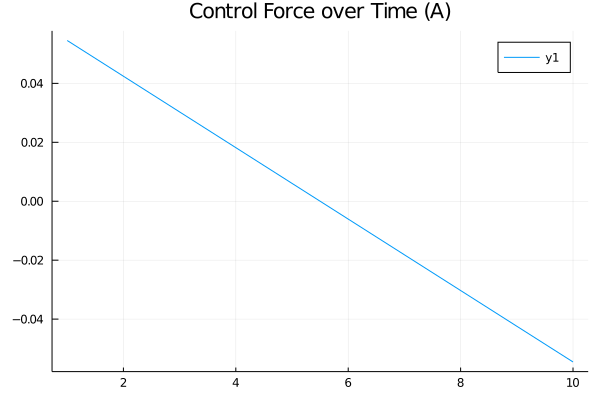

In [7]:
# Plotting control force vector over time

Plots.plot(p)
Plots.title!("Control Force over Time (A)")

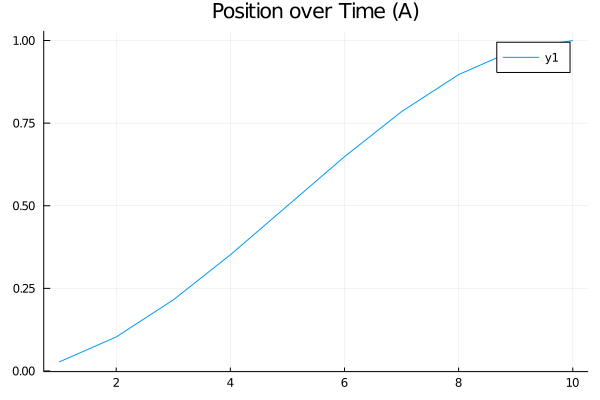

In [8]:
# Plotting position over time (A)

Plots.plot(x)
Plots.title!("Position over Time (A)")

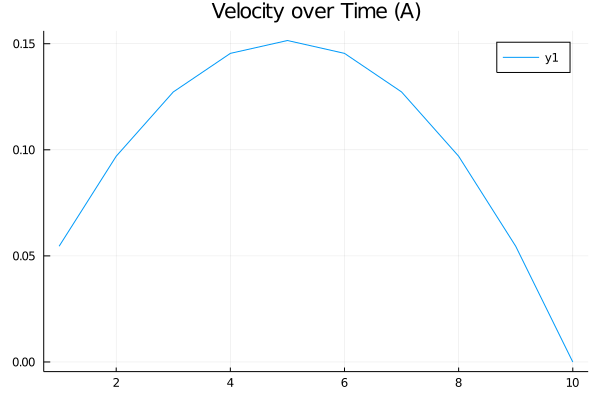

In [9]:
# Plotting velocity vector over time

Plots.plot(B*p)
Plots.title!("Velocity over Time (A)")

### Intuitive Explanation: Part A

We observe a linearly ramping control force over time that results in a smoothly increasing/stopping position curve. The velocity follows a loosely parabolic shape. 

Intuitively, this means that the optimal way to control a no-friction mass to arrive at a dead stop involves linearly ramping the force applied over time, switching directions of force application directly in the middle of its journey. The fact that the force function is centered around 0 is a reflection of the fact that net force over time must be 0 for it to stop by the end. 

## Part B: Arriving At A Dead Stop with Minimum Energy, but At Rest at 5

In [10]:
# Creating constraint matrix and running least squares to find smallest l2 norm solution:

A = zeros(3,ary_size)
A[1,:] = M[ary_size,:] # Position is 1 at time 10
A[2,:] = ones(1,ary_size) # At rest by the end (sum of force is 0 over time).
A[3,:] = M[Int(ary_size/2),:] # Position is 0 at time 5

y = [1; 0; 0]

A

3×10 Array{Float64,2}:
 9.5  8.5  7.5  6.5  5.5  4.5  3.5  2.5  1.5  0.5
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 4.5  3.5  2.5  1.5  0.5  0.0  0.0  0.0  0.0  0.0

In [11]:
# Running least squares to solve for p

p = transpose(A)*inv(A*transpose(A))*y

10-element Array{Float64,1}:
 -0.04545454545454544
 -0.007575757575757541
  0.030303030303030415
  0.06818181818181832
  0.10606060606060622
  0.09393939393939404
  0.03181818181818183
 -0.030303030303030415
 -0.09242424242424264
 -0.15454545454545487

In [12]:
# Calculating corresponding position vector

x = M*p

10-element Array{Float64,1}:
 -0.02272727272727272
 -0.07196969696969693
 -0.10984848484848471
 -0.09848484848484813
  7.355227538141662e-16
  0.19848484848484974
  0.45984848484848667
  0.7219696969696991
  0.9227272727272753
  1.0000000000000027

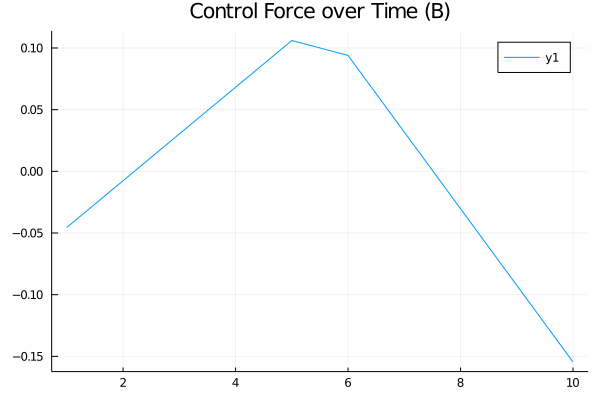

In [13]:
# Plotting control force vector over time

Plots.plot(p)
Plots.title!("Control Force over Time (B)")

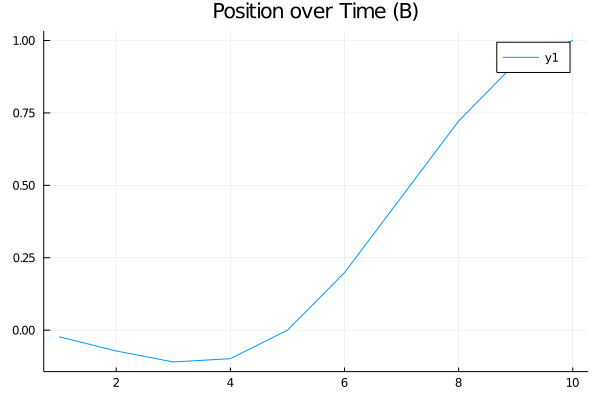

In [14]:
# Plotting position over time (A)

Plots.plot(x)
Plots.title!("Position over Time (B)")

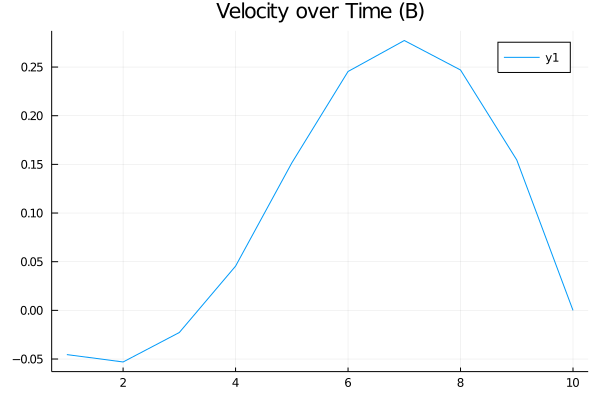

In [15]:
# Plotting velocity vector over time

Plots.plot(B*p)
Plots.title!("Velocity over Time (B)")

### Intuitive Explanation: Part B

We see the mass accelerate backwards away from its target initially, then begin accelerating towards the target such that it can be at position zero at $t = 5$. It then begins ramping down its acceleration shortly after it reaches its zero-point at $t=5$ such that it can arrive at a dead stop at the goal position with zero velocity at $t = 10$.

It is interesting that the optimal strategy in terms of energy expendature over time yields a backwards path initially. As it turns out, backing up for a 'running start' is advantageous for minimizing the $l_2$ norm of the force applied over time.